In [51]:
# Imports

import pandas as pd
import sqlite3 as sql
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
path = os.getcwd()
path = os.path.dirname(path)
path = os.path.join(path,'data/transfermarket/transfermarket.db')


In [7]:
# Connect to the sqlite3 database file.  
con = sql.connect(path)

# read the .db file from the specified SQL commands
players = pd.read_sql("""SELECT *
                          FROM players
                          LIMIT 10;""",con)

#'SELECT * FROM players' says that we are selecting all the columns from the players table, and LIMIT 10 just limits it
# to just the first 10

# We need to close the connection
con.close()

players


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,None,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,None,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,None,NaN,None,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,None,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,None,NaN,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,None,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
5,109,None,Dedê,Dedê,2013,825,dede,Brazil,Belo Horizonte,Brazil,...,None,NaN,None,Football Concept,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dede/profil/sp...,TR1,Eskisehirspor,400000.0,9500000.0
6,123,Christoph,Metzelder,Christoph Metzelder,2012,33,christoph-metzelder,Germany,Haltern,Germany,...,None,NaN,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/christoph-metz...,L1,FC Schalke 04,1500000.0,9500000.0
7,132,Tomas,Rosicky,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,...,both,179.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tomas-rosicky/...,GB1,Arsenal Football Club,350000.0,17500000.0
8,162,Marc,Ziegler,Marc Ziegler,2012,79,marc-ziegler,Germany,Blieskastel,Germany,...,right,193.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marc-ziegler/p...,L1,Verein für Bewegungsspiele Stuttgart 1893,200000.0,1250000.0
9,215,Roque,Santa Cruz,Roque Santa Cruz,2015,1084,roque-santa-cruz,Paraguay,Asunción,Paraguay,...,right,193.0,2023-12-31 00:00:00,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roque-santa-cr...,ES1,Málaga CF,250000.0,12000000.0


# Lets try to get the players with their current worth

The usual order for the captilized words in SQL is

* SELECT
* FROM
* JOIN 
    * LEFT JOIN
    * INNER JOIN (which you can just use JOIN)
    * RIGHT JOIN
* WHERE
* GROUP BY
* HAVING
* ORDER BY
* LIMIT



In [26]:
con = sql.connect(path)

players_EPL_2425 = pd.read_sql("""SELECT players.name AS name,
                                competitions.name AS league,
                               players.current_club_name AS club,
                               players.position AS position,
                               players.market_value_in_eur as transfer_worth
                               FROM players
                               LEFT JOIN competitions ON competitions.competition_id = players.current_club_domestic_competition_id
                               WHERE league = 'premier-league'
                               ORDER BY name
                               LIMIT 40;""",con)

con.close()

players_EPL_2425.dropna()

players_EPL_2425

,name,league,club,position,transfer_worth
0,Aaron Connolly,premier-league,Brighton and Hove Albion Football Club,Attack,3500000.0
1,Aaron Cresswell,premier-league,West Ham United Football Club,Defender,900000.0
2,Aaron Hickey,premier-league,Brentford Football Club,Defender,28000000.0
3,Aaron Keto-Diyawa,premier-league,Wolverhampton Wanderers Football Club,Defender,200000.0
4,Aaron Lennon,premier-league,Burnley FC,Attack,600000.0
5,Aaron McLean,premier-league,Hull City,Attack,400000.0
6,Aaron Mitchell,premier-league,Queens Park Rangers,Midfield,NaN
7,Aaron Ramsdale,premier-league,Southampton Football Club,Goalkeeper,25000000.0
8,Aaron Ramsey,premier-league,Burnley FC,Midfield,15000000.0
9,Aaron Rowe,premier-league,Huddersfield Town,Defender,150000.0


# Functions in SQL

We can use functions, like avg  COUNT, and others to make it easier to make tables

In [22]:
con = sql.connect(path)

avg_transfer_per_position = pd.read_sql("""SELECT players.position AS position,
                                        competitions.name AS league,
                                    avg(players.market_value_in_eur) AS avg_pos_value,
                                    max(players.market_value_in_eur) AS max_pos_value,
                                    min(players.market_value_in_eur) AS min_pos_value
                                    FROM players
                                    JOIN competitions ON competitions.competition_id = players.current_club_domestic_competition_id
                                    WHERE league = 'premier-league'
                                    GROUP BY position
                                    ORDER BY avg_pos_value DESC
                                    LIMIT 10""",con)
con.close()
avg_transfer_per_position

,position,league,avg_pos_value,max_pos_value,min_pos_value
0,Attack,premier-league,8.787842e+06,180000000.0,25000.0
1,Midfield,premier-league,7.038166e+06,130000000.0,10000.0
2,Defender,premier-league,6.198257e+06,80000000.0,10000.0
3,Goalkeeper,premier-league,2.894500e+06,35000000.0,10000.0
4,Missing,premier-league,1.166667e+05,150000.0,100000.0


# Lets look at each club individually and their distribution

In [98]:
con = sql.connect(path)

avg_transfer_per_club = pd.read_sql("""SELECT clubs.name AS club,
                                        competitions.name AS league,
                                    players.position AS position,
                                    avg(players.market_value_in_eur)/1000000 AS avg_player_value_per_mil,
                                    max(players.market_value_in_eur)/1000000 AS max_player_value_per_mil,
                                    min(players.market_value_in_eur)/1000000 AS min_player_value_per_mil
                                    FROM clubs
                                    JOIN competitions ON competitions.competition_id = clubs.domestic_competition_id
                                    JOIN players ON players.current_club_name = clubs.name
                                    WHERE league = 'premier-league'
                                    AND (club='Arsenal Football Club' 
                                    OR club = 'Manchester City Football Club'
                                    OR club='Liverpool FC'
                                    OR club='Aston Villa Football Club'
                                    OR club = 'Chelsea Football Club')
                                    GROUP BY club,position;""",con)
con.close()
avg_transfer_per_club

,club,league,position,avg_player_value_per_mil,max_player_value_per_mil,min_player_value_per_mil
0,Arsenal Football Club,premier-league,Attack,28.093333,140.00,0.050
1,Arsenal Football Club,premier-league,Defender,16.536000,80.00,0.050
2,Arsenal Football Club,premier-league,Goalkeeper,8.420000,35.00,0.300
3,Arsenal Football Club,premier-league,Midfield,12.504464,120.00,0.175
4,Aston Villa Football Club,premier-league,Attack,9.154348,65.00,0.075
5,Aston Villa Football Club,premier-league,Defender,6.998387,45.00,0.100
6,Aston Villa Football Club,premier-league,Goalkeeper,2.925000,28.00,0.150
7,Aston Villa Football Club,premier-league,Midfield,8.268966,50.00,0.075
8,Aston Villa Football Club,premier-league,Missing,0.150000,0.15,0.150
9,Chelsea Football Club,premier-league,Attack,16.685714,55.00,0.200


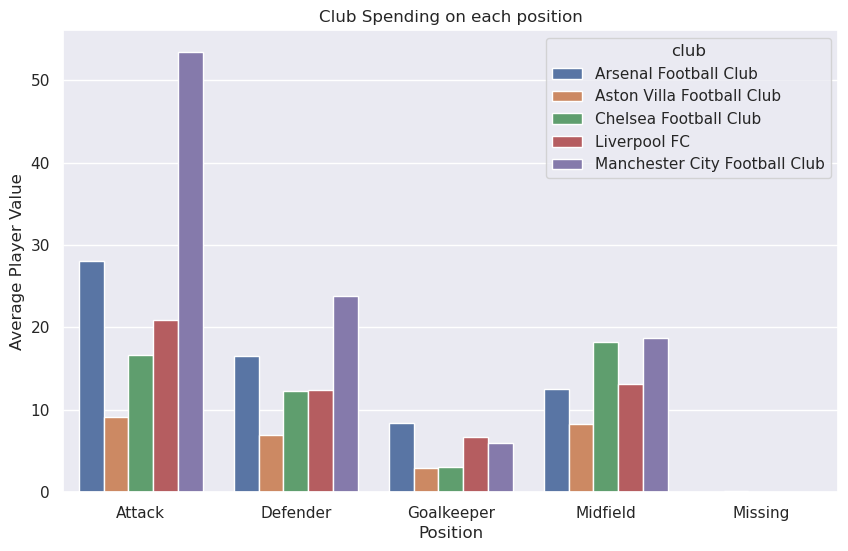

In [100]:
plt.figure(figsize=(10,6))

sns.barplot(x='position',y='avg_player_value_per_mil',hue='club',data=avg_transfer_per_club)
plt.xlabel('Position')
plt.ylabel('Average Player Value')
plt.title('Club Spending on each position')
plt.show()

# More Data Analysis on position over all

Lets look at the distribution of market values over all the players in the English Premier League, as we can see from the above avgs and max is that there is some huge outliers.

In [39]:
con = sql.connect(path)

players_EPL_2425 = pd.read_sql("""SELECT players.name AS name,
                                competitions.name AS league,
                               players.current_club_name AS club,
                               players.position AS position,
                               players.market_value_in_eur/1000000 as transfer_worth
                               FROM players
                               LEFT JOIN competitions ON competitions.competition_id = players.current_club_domestic_competition_id
                               WHERE league = 'premier-league'
                               ORDER BY name;""",con)

con.close()

players_EPL_2425.dropna()

,name,league,club,position,transfer_worth
0,Aaron Connolly,premier-league,Brighton and Hove Albion Football Club,Attack,3.5
1,Aaron Cresswell,premier-league,West Ham United Football Club,Defender,0.9
2,Aaron Hickey,premier-league,Brentford Football Club,Defender,28.0
3,Aaron Keto-Diyawa,premier-league,Wolverhampton Wanderers Football Club,Defender,0.2
4,Aaron Lennon,premier-league,Burnley FC,Attack,0.6
...,...,...,...,...,...
2186,Álex Moreno,premier-league,Nottingham Forest Football Club,Defender,13.0
2187,Álvaro Arbeloa,premier-league,West Ham United Football Club,Defender,1.5
2188,Ángel Rangel,premier-league,Swansea City,Defender,0.3
2189,Óscar Ustari,premier-league,Sunderland AFC,Goalkeeper,0.6


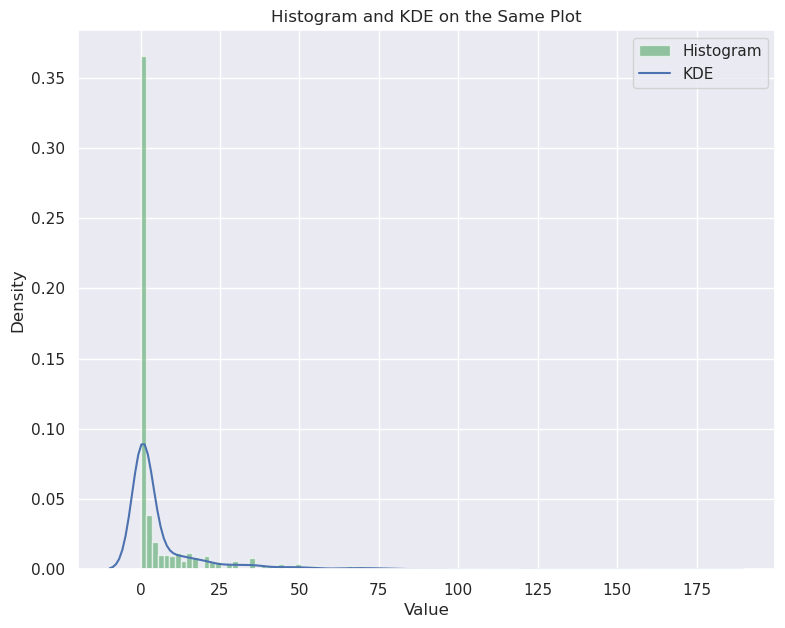

In [68]:
# Sample data
data = players_EPL_2425['transfer_worth']

# Create the figure and axis
fig, ax = plt.subplots()
#sns.set_theme(rc={'figure.figsize':(9,7)})

# Plot histogram
ax.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Histogram')

# Plot KDE
sns.kdeplot(data, ax=ax, color='b', label='KDE')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Histogram and KDE on the Same Plot')

# Show legend
ax.legend()

# Show the plot
plt.show()